<a href="https://colab.research.google.com/github/eroali/DeepLearning/blob/main/Module_2_Sonar_Data_Use_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

61


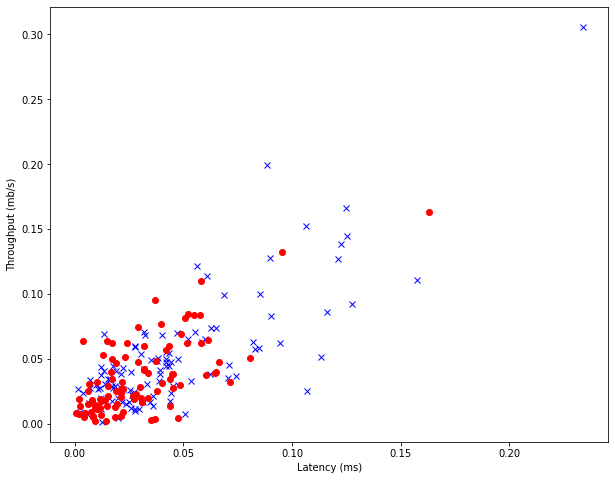

(165, 59)
(165, 2)
(42, 59)
(42, 2)
epoch :  0  -  cost:  0.68906105
epoch :  1  -  cost:  0.68616545
epoch :  2  -  cost:  0.68367696
epoch :  3  -  cost:  0.6813537
epoch :  4  -  cost:  0.6791197
epoch :  5  -  cost:  0.67695
epoch :  6  -  cost:  0.67483526
epoch :  7  -  cost:  0.6727712
epoch :  8  -  cost:  0.670755
epoch :  9  -  cost:  0.66878456
epoch :  10  -  cost:  0.66685796
epoch :  11  -  cost:  0.6649732
epoch :  12  -  cost:  0.6631286
epoch :  13  -  cost:  0.66132265
epoch :  14  -  cost:  0.65955365
epoch :  15  -  cost:  0.65782034
epoch :  16  -  cost:  0.6561212
epoch :  17  -  cost:  0.6544548
epoch :  18  -  cost:  0.65282
epoch :  19  -  cost:  0.65121555
epoch :  20  -  cost:  0.6496404
epoch :  21  -  cost:  0.6480933
epoch :  22  -  cost:  0.64657336
epoch :  23  -  cost:  0.64507955
epoch :  24  -  cost:  0.6436109
epoch :  25  -  cost:  0.6421665
epoch :  26  -  cost:  0.6407455
epoch :  27  -  cost:  0.63934726
epoch :  28  -  cost:  0.6379708
epoch :  

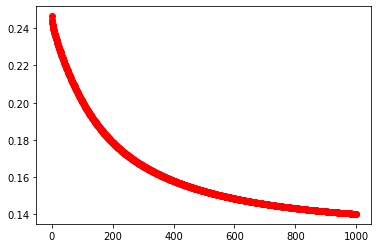

Accuracy:  0.8333333


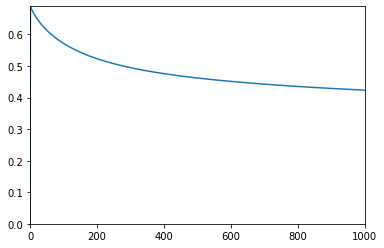

In [ ]:



import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf1 = tf.compat.v1

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import  shuffle
from sklearn.model_selection import train_test_split


#@ function to read the sonar dataset
def read_dataset():
    df = pd.read_csv("sonar.csv")
    print(len(df.columns))
    X = df[df.columns[1:60]].values
    y=df[df.columns[60]]
    #encode the depedent variable, single it has more than one class
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    Y = one_hot_encode(y)
    return(X,Y,y)


#@normalise the features of the dataset
def feature_normalize(features):
    mu = np.mean(features,axis=0)
    sigma = np.std(features,axis=0)
    normalize_features = (features - mu) / sigma
    return(normalize_features)



#@appending the bias
def append_bias_reshape(features):
    n_training_samples = features.shape[0]
    n_dim = features.shape
    features = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim+1])
    return features

#@define the one hot encode function
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode



#@plot the graph for the data
def plot_points(features,labels):
    normal = np.where(labels == 0)
    outliers = np.where(labels == 1)
    fig = plt.figure(figsize=(10,8))
    plt.plot(features[normal ,0],features[normal ,1],'bx')
    plt.plot(features[outliers,0],features[outliers ,1],'ro')
    plt.xlabel('Latency (ms)')
    plt.ylabel('Throughput (mb/s)')
    plt.show()


#@read the data
X,Y,y = read_dataset() #X - Features , Y - Labels
normalized_featues = feature_normalize(X)
plot_points(X,y)


#@Transform the data in training and testing
X,Y = shuffle(X,Y,random_state=1)
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.20, random_state=42)

#@print the shape of the train and test data values
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



learning_rate = 0.1
training_epochs = 1000

cost_history = np.empty(shape=[1],dtype=float)

n_dim = X.shape[1]
n_class = 2

x = tf1.placeholder(tf.float32,[None,n_dim])
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))


#@initialize all variables.
init = tf1.global_variables_initializer()


y_ = tf1.placeholder(tf.float32,[None,n_class])
y = tf.nn.softmax(tf.matmul(x, W)+ b)
cost_function = tf1.reduce_mean(-tf1.reduce_sum((y_ * tf1.log(y)),reduction_indices=[1]))
training_step = tf1.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)


sess = tf1.Session()
sess.run(init)
mse_history = []


for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={x:train_x,y_:train_y})
    cost = sess.run(cost_function,feed_dict={x: train_x,y_: train_y})
    cost_history = np.append(cost_history,cost)
    pred_y = sess.run(y, feed_dict={x: test_x})
    print('epoch : ', epoch,  ' - ', 'cost: ', cost)


    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_history.append(sess.run(mse))


print("MSE:",mse_history)
plt.plot(mse_history, 'ro-')
plt.show()


correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy: ",(sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))



plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()










